In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set(style="whitegrid")

In [18]:
clean_path = "../data/processed/cleaned_long.csv"
synthetic_path = "../data/external/synthetic_theft.csv"

df_clean = pd.read_csv(clean_path, parse_dates=["DATE"])
df_syn = pd.read_csv(synthetic_path, parse_dates=["DATE"])

print("Clean dataset:", df_clean.shape)
print("Synthetic dataset:", df_syn.shape)

Clean dataset: (600, 4)
Synthetic dataset: (480, 6)


In [19]:
df_merged = pd.concat([df_clean, df_syn], ignore_index=True)
print("Merged:", df_merged.shape)

save_path = "../data/processed/cleaned_with_synthetic.csv"
df_merged.to_csv(save_path, index=False)

print("Saved merged dataset →", save_path)

Merged: (1080, 6)
Saved merged dataset → ../data/processed/cleaned_with_synthetic.csv


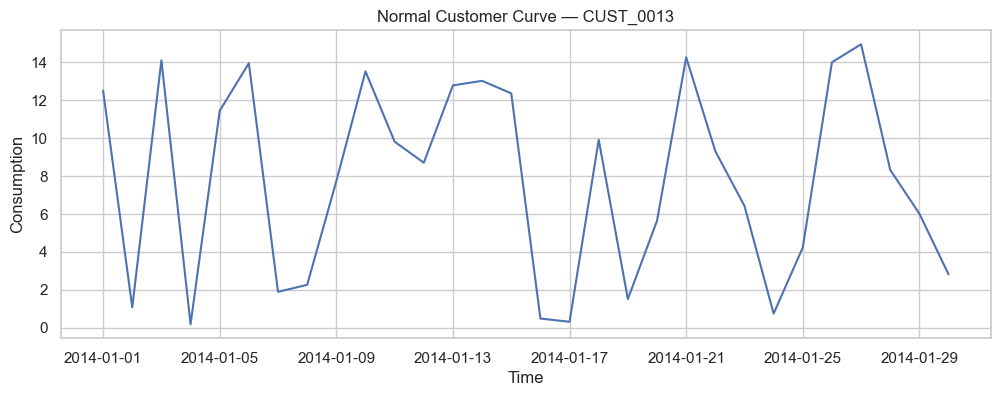

In [24]:
sample_normal = (
    df_clean.sample(1)["CONS_NO"].values[0]
)

df_plot = df_clean[df_clean["CONS_NO"] == sample_normal]

plt.figure(figsize=(12,4))
plt.plot(df_plot["DATE"], df_plot["CONSUMPTION"])
plt.title(f"Normal Customer Curve — {sample_normal}")
plt.xlabel("Time")
plt.ylabel("Consumption")
plt.show()

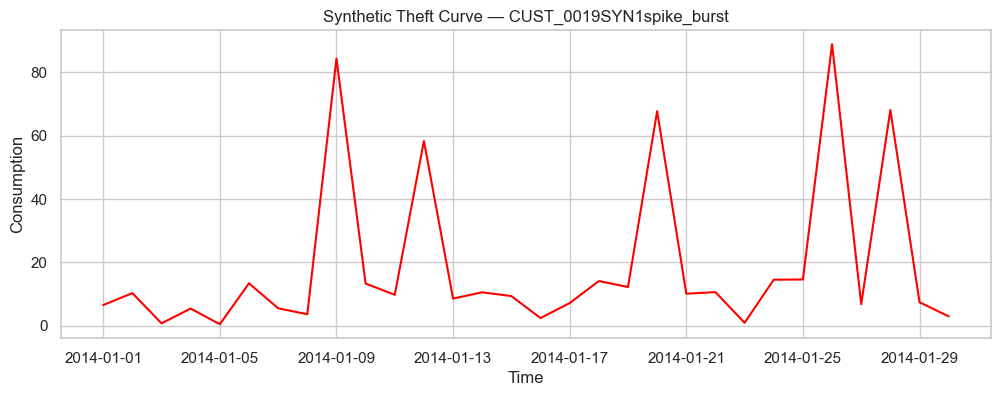

In [25]:
sample_theft = (
    df_syn.sample(1)["CONS_NO"].values[0]
)

df_plot = df_syn[df_syn["CONS_NO"] == sample_theft]

plt.figure(figsize=(12,4))
plt.plot(df_plot["DATE"], df_plot["CONSUMPTION"], color="red")
plt.title(f"Synthetic Theft Curve — {sample_theft}")
plt.xlabel("Time")
plt.ylabel("Consumption")
plt.show()

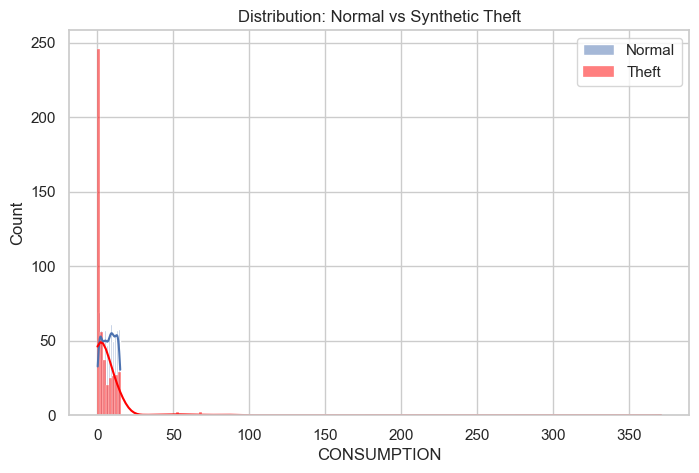

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["CONSUMPTION"], label="Normal", kde=True)
sns.histplot(df_syn["CONSUMPTION"], color="red", label="Theft", kde=True)
plt.legend()
plt.title("Distribution: Normal vs Synthetic Theft")
plt.show()

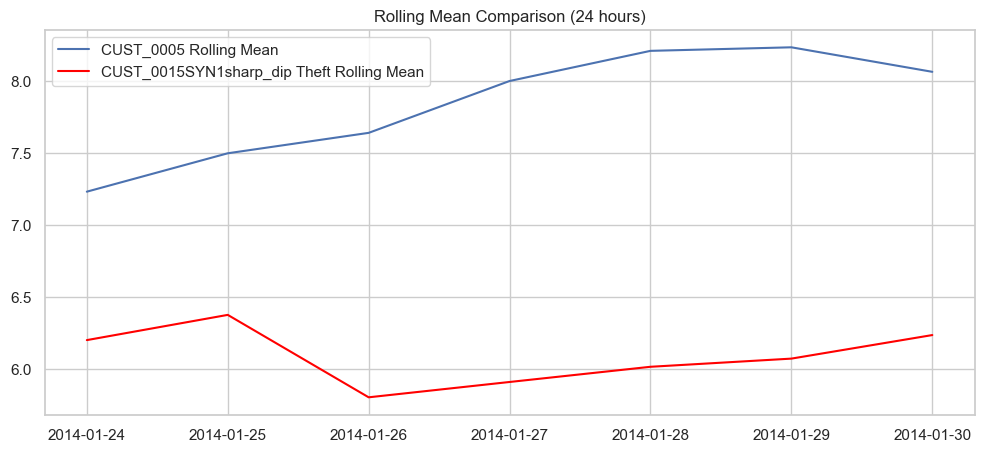

In [27]:
cust_n = df_clean.sample(1)["CONS_NO"].values[0]
cust_t = df_syn.sample(1)["CONS_NO"].values[0]

d1 = df_clean[df_clean["CONS_NO"] == cust_n].set_index("DATE")
d2 = df_syn[df_syn["CONS_NO"] == cust_t].set_index("DATE")

plt.figure(figsize=(12,5))
plt.plot(d1["CONSUMPTION"].rolling(24).mean(), label=f"{cust_n} Rolling Mean")
plt.plot(d2["CONSUMPTION"].rolling(24).mean(), label=f"{cust_t} Theft Rolling Mean", color="red")
plt.legend()
plt.title("Rolling Mean Comparison (24 hours)")
plt.show()

In [17]:
print("Day-6 synthetic generation & visual checks complete.")

Day-6 synthetic generation & visual checks complete.
